## –ê–Ω–∞–ª–∏–∑ —Å–∫–∞—á–∞–Ω—ã—Ö —Ç–≤–∏—Ç—Ç–æ–≤ –Ω–∞ –æ–±—É—á–µ–Ω–æ–π –º–æ–¥–µ–ª–∏ –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

–ó–∞–≥—Ä—É–∑–∫–∞ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–Ω—ã—Ö —Ç–≤–∏—Ç—Ç–æ–≤

In [1]:
import numpy as np
import pickle
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_tweets = pickle.load(open('all_tweets.pkl', 'rb'))
print 'Total tweets:', len(all_tweets)

Total tweets: 10013


–ó–∞–≥—Ä—É–∑–∫–∞ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (Logistic Regression model)

In [3]:
modelLR = pickle.load(open('TweetLogisticRegression.pkl', 'rb'))
tfidf_vectorizer = pickle.load(open('TweetTfidfVectorizer.pkl', 'rb'))

–£–¥–∞–ª—è–µ–º –∏–∑ —Ç–≤–∏—Ç—Ç–æ–≤ –≤—Å–µ —Å—Å—ã–ª–∫–∏, —Ü–∏—Ñ—Ä—ã, —Ö—ç—à—Ç–µ–≥–∏, username –∏ –ø—Ä–æ—á–∏–π –º—É—Å–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ –Ω—É–∂–µ–Ω –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –æ–∫—Ä–∞—Å–∫–∏

In [4]:
tweets_clean = []
for s in all_tweets:
    t = ""
    t = re.sub('(http\S+)', "", s)
    t = re.sub('[^a-zA-z]', " ", t)
    t = re.sub('(#\w+)|(@\w+)|(\d+)|(&gt;)|(&lt;)', "", t)
    t = re.sub('^\s+', "", t)
    t = re.sub('\\n', " ", t)
    if t!='':
        tweets_clean.append(t)

–ü–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏ –æ—Å—Ç–∞–ª–æ–≤—å –≤—Å–µ–≥–æ —Ç–≤–∏—Ç—Ç–æ–≤:

In [5]:
len(tweets_clean)

9464

## –ê–Ω–∞–ª–∏–∑ –Ω–∞ "–ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ" –∏ "–Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ"

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –æ—á–∏—â–µ–Ω–Ω—ã–µ —Ç–≤–∏—Ç—Ç—ã –≤ —á–∏—Å–ª–æ–≤—ã–µ –≤–µ–∫—Ç–æ—Ä—ã

In [6]:
tfidf = tfidf_vectorizer.transform(tweets_clean)
tfidf

<9464x500000 sparse matrix of type '<type 'numpy.float64'>'
	with 161960 stored elements in Compressed Sparse Row format>

In [7]:
predicted = modelLR.predict(tfidf)

In [8]:
pos = predicted.sum()
neg = len(tweets_clean)-pos

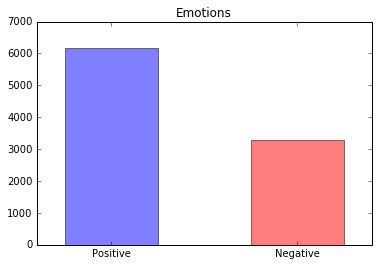

In [9]:
plt.bar([1], [pos], align='center', width=0.5, color='b', alpha=0.5)
plt.bar([2], [neg], align='center', width=0.5, color='r', alpha=0.5)
plt.title('Emotions')
#plt.grid()
plt.xticks([1, 2], ['Positive', 'Negative']);

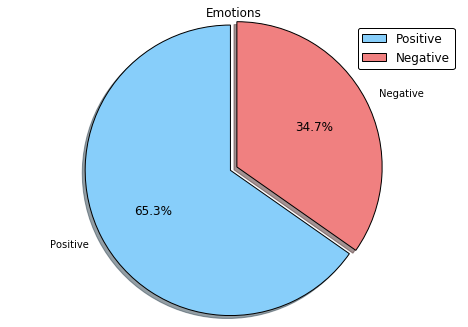

In [137]:
labels = 'Positive','Negative'
sizes = pos, neg
colors = ['lightskyblue', 'lightcoral']
explode = (0, 0.05)

#plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, textprops = {'fontsize' : 12})

plt.axis('equal')
plt.legend(fancybox=True)
plt.tight_layout(rect=(0, 0, 1.1, 1.1))
plt.title('Emotions');

## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –Ω–∞ "–Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ", "–ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ" –∏ "–Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ"


### –ò–µ—Ä–∞—Ä—Ö–∏—á–µ—Å–∫–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

–°–Ω–∞—á–∞–ª–∞ –≤—ã–¥–µ–ª–∏–º –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ —Ç–≤–∏—Ç—Ç—ã

In [138]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import treebank

In [139]:
PosNeg = []
Neutral = 0
Pos_or_Neg = 0

In [140]:
p = list(opinion_lexicon.positive())
n = list(opinion_lexicon.negative())
tokenizer = treebank.TreebankWordTokenizer()

In [141]:
for i in xrange(len(all_tweets)):
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(all_tweets[i])]
    
    for word in tokenized_sent:
        if word in p:
            Pos_or_Neg += 1 # positive
            PosNeg.append(all_tweets[i])
            break
        elif word in n:
            Pos_or_Neg += 1 # negative
            PosNeg.append(all_tweets[i])
            break

–ü–æ–ª—É—á–∏–ª–∏ –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö —Ç–≤–∏—Ç—Ç–æ–≤:

In [142]:
Neutral = len(all_tweets) - Pos_or_Neg
Neutral

3778

–£–¥–∞–ª—è–µ–º –∏–∑ —Ç–≤–∏—Ç—Ç–æ–≤ –≤—Å–µ —Å—Å—ã–ª–∫–∏, —Ü–∏—Ñ—Ä—ã, —Ö—ç—à—Ç–µ–≥–∏, username –∏ –ø—Ä–æ—á–∏–π –º—É—Å–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ –Ω—É–∂–µ–Ω –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –æ–∫—Ä–∞—Å–∫–∏

In [143]:
tweets_clean = []
for s in PosNeg:
    t = ""
    t = re.sub('(http\S+)', "", s)
    t = re.sub('[^a-zA-z]', " ", t)
    t = re.sub('(#\w+)|(@\w+)|(\d+)|(&gt;)|(&lt;)', "", t)
    t = re.sub('^\s+', "", t)
    t = re.sub('\\n', " ", t)
    if t!='':
        tweets_clean.append(t)

–¢–µ–ø–µ—Ä—å –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ–º —Ç–≤–∏—Ç—Ç—ã –Ω–∞ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ.

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –æ—á–∏—â–µ–Ω–Ω—ã–µ —Ç–≤–∏—Ç—Ç—ã –≤ —á–∏—Å–ª–æ–≤—ã–µ –≤–µ–∫—Ç–æ—Ä—ã:

In [144]:
tfidf = tfidf_vectorizer.transform(tweets_clean)
tfidf

<6235x500000 sparse matrix of type '<type 'numpy.float64'>'
	with 123731 stored elements in Compressed Sparse Row format>

–ö–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ–º —Ç–≤–∏—Ç—Ç—ã –Ω–∞ –Ω–∞ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ. –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º —Ç–≤–∏—Ç—Ç–æ–º –±—É–¥–µ–º —Å–∏—á—Ç–∞—Ç—å —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –æ—Ç 0.65 –∏ –≤—ã—à–µ, –∞ –≤—Å–µ, —á—Ç–æ –º–µ–Ω—å—à–µ ‚Äî –Ω–µ–π—Ç—Ä–∞–ª—å–Ω—ã–º.

In [148]:
predicted = modelLR.predict_proba(tfidf)

In [352]:
Pos_tweets = []
Neg_tweets = []
Neu_tweets = []

v = 0.55

for i in range(len(predicted)):
    if predicted[i,1]>=v:
        Pos_tweets.append(PosNeg[i])
    elif predicted[i,0]>=v:
        Neg_tweets.append(PosNeg[i])
    else:
        Neu_tweets.append(PosNeg[i])

In [353]:
pos = len(Pos_tweets)
neg = len(Neg_tweets)
neu = len(Neu_tweets)

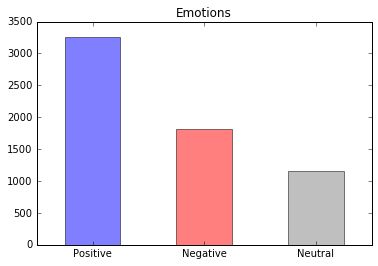

In [354]:
plt.bar([1], [pos], align='center', width=0.5, color='blue', alpha=0.5)
plt.bar([2], [neg], align='center', width=0.5, color='red', alpha=0.5)
plt.bar([3], [neu], align='center', width=0.5, color='gray', alpha=0.5)
plt.title('Emotions')
#plt.grid()
plt.xticks([1, 2, 3], ['Positive', 'Negative', 'Neutral']);

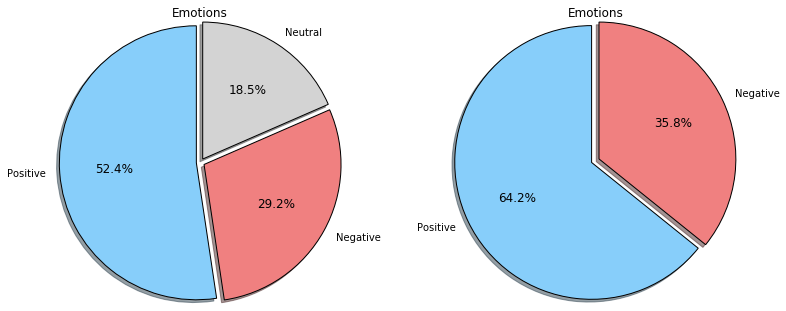

In [355]:
plt.figure(figsize=(13,5))

labels = 'Positive','Negative', 'Neutral'
sizes = pos, neg, neu
colors = ['lightskyblue', 'lightcoral', 'lightgray']
explode = (0.03, 0.03, 0.03)
plt.subplot(121)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, textprops = {'fontsize' : 12})
plt.axis('equal')
plt.title('Emotions');

labels = 'Positive','Negative'
sizes = pos, neg
colors = ['lightskyblue', 'lightcoral']
explode = (0.03, 0.03)
plt.subplot(122)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, textprops = {'fontsize' : 12})
plt.axis('equal')
plt.title('Emotions');

### –ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–ª–∏—Å—å —Ç–≤–∏—Ç—Ç—ã:

**–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ**

In [349]:
for i in range(3):
    print Pos_tweets[i], '\n'

RT @caro: Russia, if you're listening, can you get that Wu-Tang Clan album from that weird hedge fund guy? Thanks 

Scroll down my tweets:  China, Russia, &amp; Netherlands are reading the following articles on my blog.  Thank you. Sincerely, Slim 

of Russian History at Princeton &amp; NYU, one of the few Russia experts in the USA to speak out about the risk of war. https://t.co/rKUST98q5k 



**–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ**

In [350]:
for i in range(3):
    print Neg_tweets[i], '\n'

Trump asks Russia to send emails,that's a national security risk? 

But,Hillary 33 000 emails? üò´

DNC don't like competition #EmailGate 

RT @imfabulous13: Putin wants to break up NATO. 
Trump wants to break up NATO.
Russia hacks DNC.
Trump softens GOP stance on Ukraine. https‚Ä¶ 

@morningmika @Morning_Joe and no mention of Uraniumone and the 20% reserve Russia got through Hillary's help? Fake patriotism #TrumpPence16 



**–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ**

In [351]:
for i in range(3):
    print Neu_tweets[i], '\n'

Krauthammer: Clinton Reaction To Trump's Russia Statement Admitted She Deleted Work-Related Emails - Breitbart https://t.co/v5lnvhFLsw 

RT @Kasparov63: Instead of owing Mitt Romney an apology for his being right on Russia in 2012, what about owing him a candidacy? 

Love this writeup. Wish i did the moscow river and botanical garden tours.

A $1,000 Day in Moscow for $100 https://t.co/iIm4VEfBKX 

